<a href="https://colab.research.google.com/github/javierexe/predicciones-de-ventas/blob/main/Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto 1

##Parte 1

###Diccionario de datos para este conjunto de datos:

|Nombre de la variable| Descripción                                  |
|---------------------|----------------------------------------------|
|Item_Identifier|Identificación única del producto|
|Item_Weight|Peso del producto|
|Item_Fat_Content|Si el producto es bajo en grasa o regular
|Item_Visibility|Porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto
|Item_Type|Categoría a la que el producto pertenece
|Item_MRP|Precio máximo de venta al público (precio de catálogo) del producto
|Outlet_Identifier|Identificación única de la tienda
|Outlet_Establishment_Year|El año en que se estableció la tienda
|Outlet_Size|El tamaño de la tienda en cuanto al área total
|Outlet_Location_Type|El tipo de área donde se encuentra la tienda
|Outlet_Type|Si el punto de venta es una tienda de comestibles o algún tipo de supermercado
|Item_Outlet_Sales|Ventas del producto en una tienda particular. Es la variable objetivo a predecir.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
file = '/content/drive/MyDrive/Coding DOJO/files/sales_predictions_2023.csv'

###DataFrame

In [5]:
df = pd.read_csv(file)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Parte 2

###1) ¿Cuántas filas y columnas?

In [6]:
df.shape
print('RESPUESTA 1: Hay 8.523 filas y 12 columnas')

RESPUESTA 1: Hay 8.523 filas y 12 columnas


###2) ¿Cuáles son los tipos de datos en cada variable?

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

###3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.


In [8]:
print(df[df.duplicated()].count())
print('\nRESPUESTA 3: No hay valores duplicados')

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

RESPUESTA 3: No hay valores duplicados


###4) Identifiquen los valores faltantes.

In [9]:
#columnas totales - columnas con valores faltantes (NaN)
falt_IW = len(df)-df['Item_Weight'].count()
falt_OS = len(df)-df['Outlet_Size'].count()
print('RESPUESTA 4:\n')
print(f'En la columna Item_Weight faltan {falt_IW} valores')
print(f'En la columna Outlet_Size faltan {falt_OS} valores')

RESPUESTA 4:

En la columna Item_Weight faltan 1463 valores
En la columna Outlet_Size faltan 2410 valores


In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).


Al recorrer el df se observa que el cada valor del identificador del producto ('Item_Identifier') siempre tiene el mismo peso, y valores en blanco.
Por lo tanto, la idea es rellenar los valores vacíos del peso, con el peso correspondiente de cada identificador

In [11]:
#Ordenamos el df por los valores de 'Item_Identifier' y por 'Item_Weight'
df.sort_values(['Item_Identifier', 'Item_Weight'], ascending=True, inplace=True)
#df_item.isna().sum()

In [12]:
#con el df ya ordenado, reemplazamos los valores NaN con el método 'ffill' de .fillna()
#Éste rellena los valores faltantes hacia a bajo reemplazándolos con el último valor no Nulodf['Item_Weight'].fillna(method= 'ffill', inplace=True)
#df2[['Discount','Fee']] =  df[['Discount','Fee']].fillna('0')
df['Item_Weight'].fillna(method='ffill', inplace=True)

In [13]:
#rellenamos correctamente los valores nulos de la columna 'Item_Weight'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 118 to 7166
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


Si revisamos las filas con valores nulos en la columna *Outlet_Size* veremos que estos sólo se encuentran en dos tipos de tiendas: *Grocery Store* y *Supermarket Type1*



In [14]:
df_filt=df.iloc[:,6:12]
df_filt=df['Outlet_Size'].isna()
df[df_filt]['Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

La tienda *Grocery Store* sólo tiene *'Small'* como valor para la columna *Outlet_Size* y lo mismo ocurre con la tienda del tipo *Supermarket Type1*

In [15]:
df['Outlet_Size'].loc[df['Outlet_Type'] == 'Grocery Store'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

In [16]:
df['Outlet_Size'].loc[(df['Outlet_Type'] == 'Supermarket Type1')&(df['Outlet_Location_Type'] == 'Tier 2')].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

Por lo tanto, reemplazaremos todos los valores vacíos (NaN) por *'Small'*

In [17]:
df['Outlet_Size'].fillna('Small', inplace=True)

###6) Confirmen que no hay valores faltantes después de abordarlos.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 118 to 7166
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


###7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent)

In [19]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
#la columna 'Item_Fat_Content' pasó de tener 5 valores distintos a sólo 2.
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat','low fat': 'Low Fat','reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [21]:
(df.select_dtypes(exclude = object).describe().round(1))

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.0,8523.0,8523.0,8523.0,8523.0
mean,12.9,0.1,141.0,1997.8,2181.3
std,4.6,0.1,62.3,8.4,1706.5
min,4.6,0.0,31.3,1985.0,33.3
25%,8.8,0.0,93.8,1987.0,834.2
50%,12.6,0.1,143.0,1999.0,1794.3
75%,16.8,0.1,185.6,2004.0,3101.3
max,21.4,0.3,266.9,2009.0,13087.0


##Parte 3

Continuaremos trabajando en el proyecto de predicción de ventas. El objetivo es ayudarlos a comprender los datos en relación con los productos y puntos de ventas que desempeñan un papel crucial en el aumento de ventas.

Para la tercera parte, la tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada:

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



* Histograma para ver las distribuciones de diversas características en el conjunto de datos.









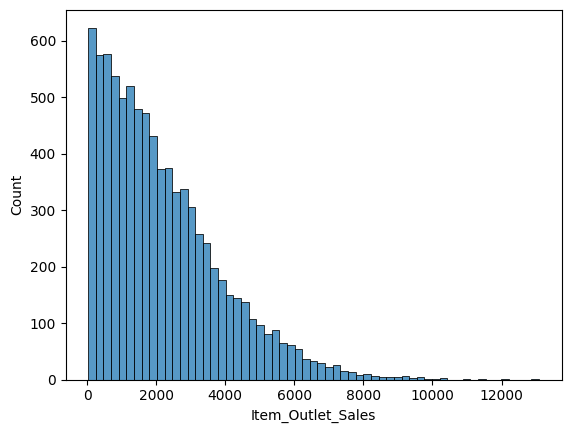

In [23]:
sns.histplot(data=df, x='Item_Outlet_Sales');

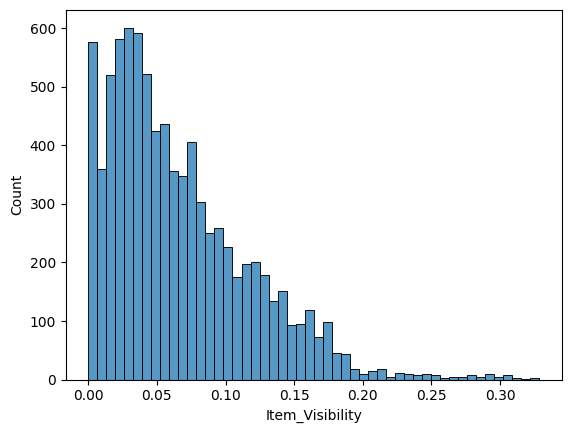

In [24]:
sns.histplot(data=df, x='Item_Visibility');

* Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

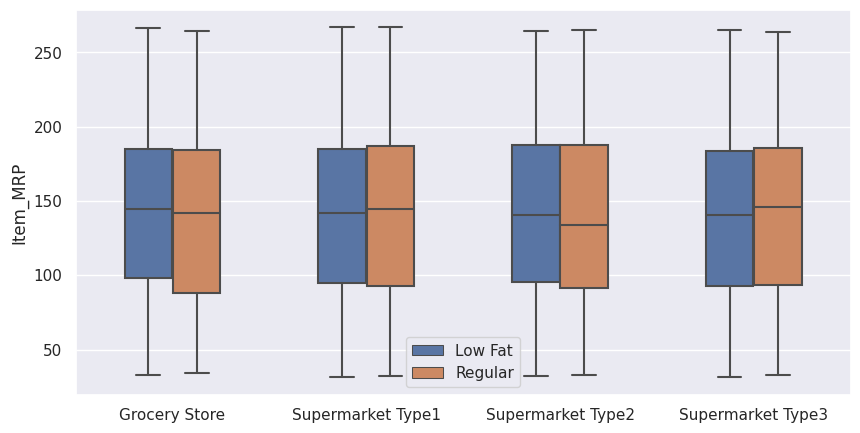

In [25]:
df_ord = df.sort_values('Outlet_Type')
sns.set(rc = {"figure.figsize":(10,5)})
sns.boxplot(df_ord, y='Item_MRP', x='Outlet_Type', hue='Item_Fat_Content', width=0.5)
plt.legend(loc='best')
plt.xlabel(None);

In [77]:
df['Item_Type'].unique()
df_alim = df[df.Item_Type.isin(['Soft Drinks','Dairy','Canned','Frozen Foods',
                                'Fruits and Vegetables','Snack Foods',
                                'Baking Goods','Starchy Foods','Meat',
                                'Seafood', 'Breakfast', 'Breads'])]

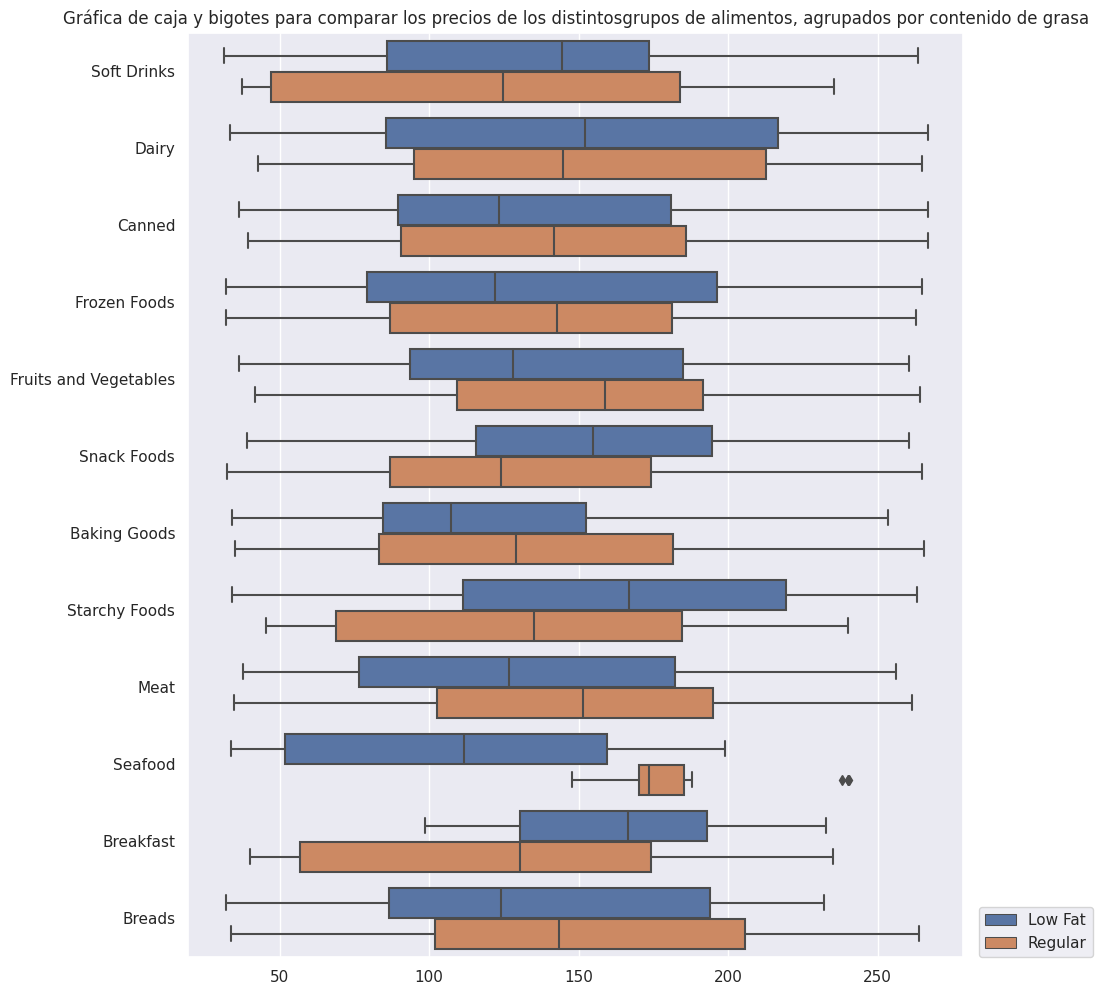

In [82]:
sns.set(rc = {"figure.figsize":(10,12)})
sns.boxplot(df_alim, x='Item_MRP', y='Item_Type', hue='Item_Fat_Content', width=0.8)
plt.legend(loc=(1.02, 0))
plt.xlabel(None, rotation=75);
plt.ylabel(None);
plt.title('Gráfica de caja y bigotes para comparar los precios de los distintos\
grupos de alimentos, agrupados por contenido de grasa');

* Mapa de calor de la correlación entre las características.


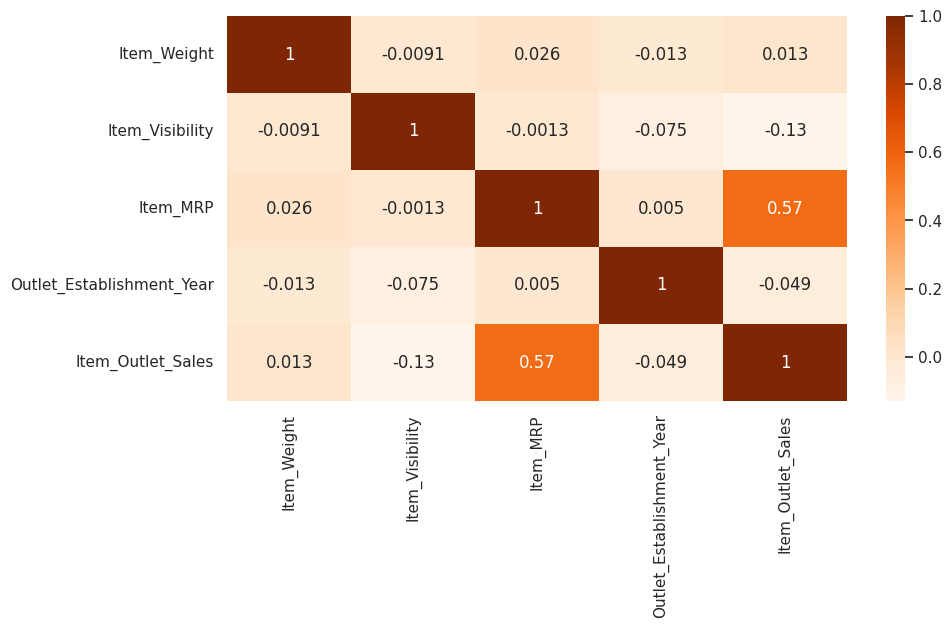

In [26]:
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='Oranges');
#El mapa de calor nos muestra que prácticamente no existe correlación
#entre las caracteristicas medibles de los productos, salvo entre
#Item MRP y Item Outlet Sales, que existe una correlación media.

No duden en agregar más del mínimo. ¡Recuerden que esta es su oportunidad para mostrar sus habilidades!

Comprometan su trabajo en GitHub.

¡Entreguen un enlace a su repositorio de GitHub! Continuaremos trabajando en el proyecto un poco cada semana.